## Project - Rainfall Prediction

#### Problem Statement
As part of Module 13, you are required to complete the “Rainfall Prediction” project. This project will test your ability to handle weather data, perform preprocessing, apply machine learning models (specifically Linear Regression), and visualize the relationships between weather attributes and precipitation levels using Python in Jupyter Notebook. You will work with the Austin Weather dataset, which contains weather information like temperature, humidity, dew point, visibility, wind speed, and precipitation. The objective is to predict precipitation levels based on various weather parameters and understand the trends and dependencies visually.
________________________________________
####  What You Will Do
In this project, you will load the Austin weather dataset, clean the data by removing irrelevant columns and handling missing values or symbols like "T" or "-", and preprocess the data for modeling. You will apply Linear Regression using sklearn to predict precipitation levels (PrecipitationSumInches) and analyze the relationship between precipitation and various weather attributes such as average temperature, humidity, and wind speed. You'll also visualize precipitation trends over time and its correlation with different weather indicators using matplotlib. Your work must be clearly explained using comments and headings in a structured Jupyter Notebook (.ipynb).


In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [4]:
# Load Rainfall data file
df = pd.read_csv("austin_weather.csv")

In [5]:
# shows rows
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [6]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [7]:
# statistical summary
df.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [8]:
# check the shape of data
df.shape

(1319, 21)

In [9]:
# list the columns
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [10]:
# check null counts
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

### Data Cleaning and Preprocessing

In [12]:
# Drop features
df.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis = 1, inplace= True)

In [13]:
# check the shape after droping the features
df.shape

(1319, 17)

In [14]:
# replace 'T' and '-' with 0 
df.replace(['T', '-'], 0 , inplace = True)

In [15]:
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,0


In [16]:
# convert all columns to numeric
df = df.apply(pd.to_numeric, errors = 'coerce')

In [17]:
# handle missing values
df.fillna(df.mean(), inplace = True)

In [18]:
# select features for prediction
X = df.drop(columns = ["PrecipitationSumInches"])
Y = df["PrecipitationSumInches"]

In [19]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 10)

In [20]:
X_train.shape  # check the training data shape

(923, 16)

In [21]:
X_test.shape   # check the test data shape

(396, 16)

#### Linear Regression model

In [23]:
# build and train Linear Regression model
lm_model = LinearRegression()

In [24]:
lm_model.fit(X_train, Y_train)

LinearRegression()

In [25]:
# prediction on test using above trained model
Y_pred = lm_model.predict(X_test)

In [26]:
# Calculate MSE
error = mean_squared_error(Y_test,Y_pred)

In [27]:
error

0.14766353978718427

In [28]:
print('MSE:', mean_squared_error(Y_test, Y_pred))

MSE: 0.14766353978718427


In [29]:
# Manual calculation for MSE
np.sum((Y_test - Y_pred)**2)/396

0.14766353978718427

#### Preciptation over time

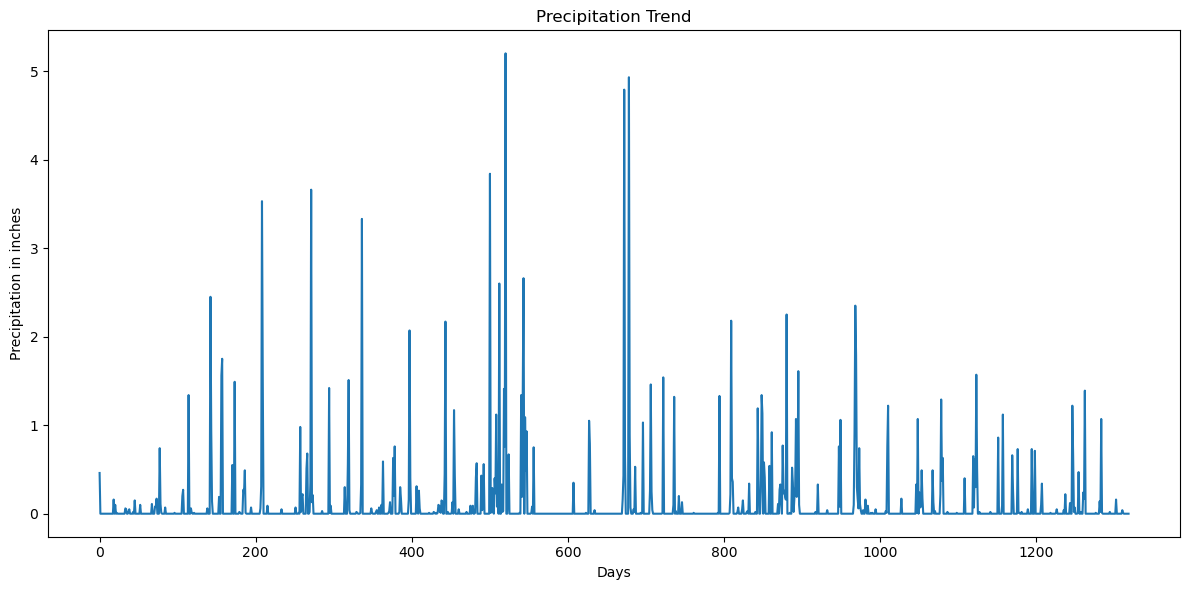

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(data= df, y = 'PrecipitationSumInches', x = range(len(df)))
plt.title('Precipitation Trend')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.tight_layout()
plt.show()

#### Correlation Heatmap

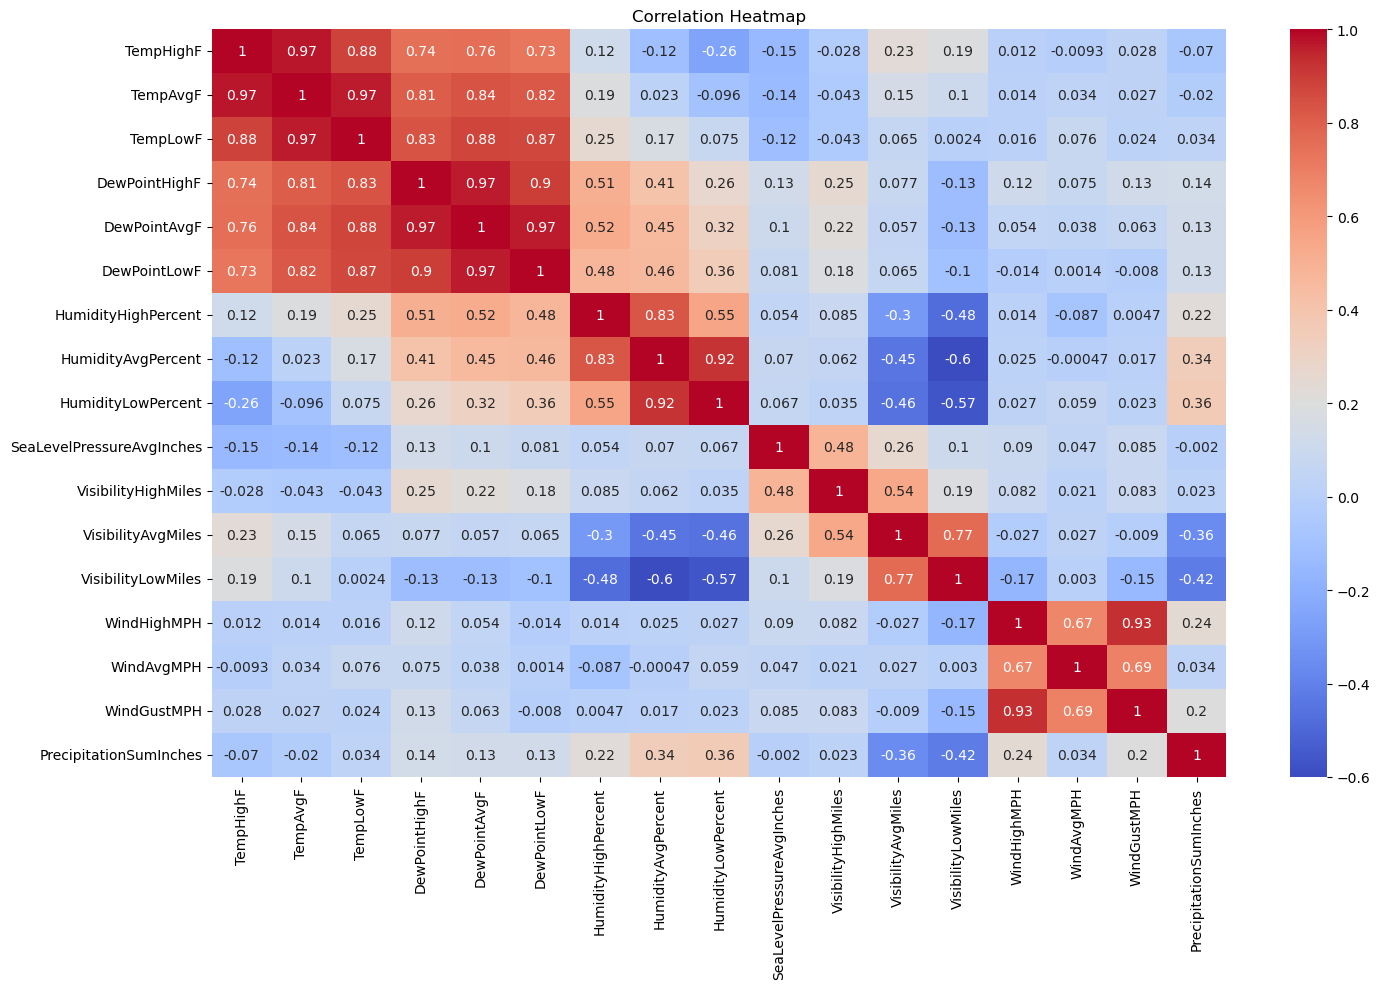

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Avg Temperature vs Precipitation

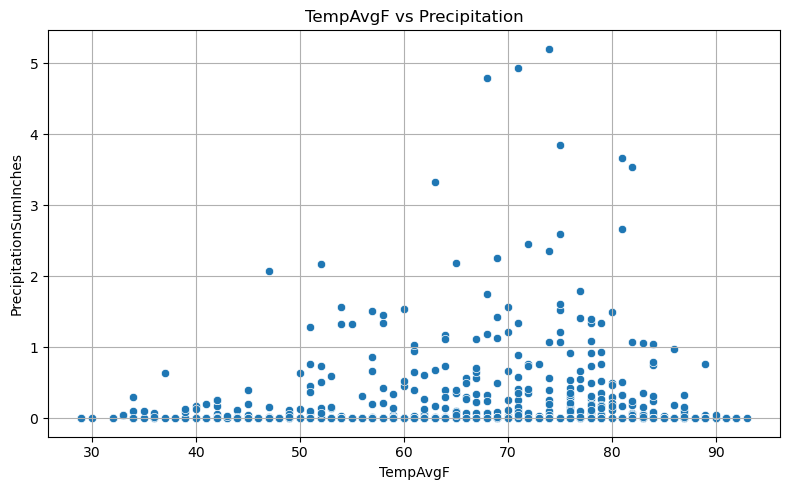

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x= 'TempAvgF', y ='PrecipitationSumInches', data=df)
plt.title('TempAvgF vs Precipitation')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Avg Humidity vs Precipitation

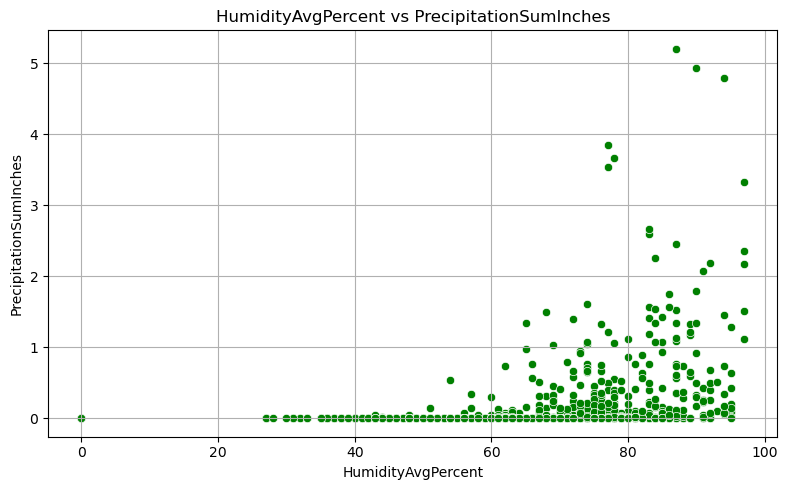

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'HumidityAvgPercent', y= 'PrecipitationSumInches', data =df, color ='green')
plt.title('HumidityAvgPercent vs PrecipitationSumInches')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Avg Wind speed vs Precipitation

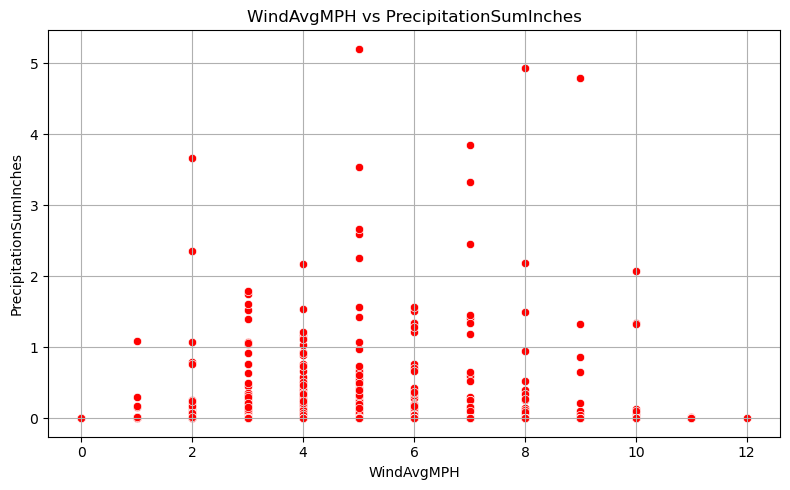

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'WindAvgMPH', y= 'PrecipitationSumInches', data =df, color ='red')
plt.title('WindAvgMPH vs PrecipitationSumInches')
plt.grid(True)
plt.tight_layout()
plt.show()


### Precipitation vs Attributes trend graph

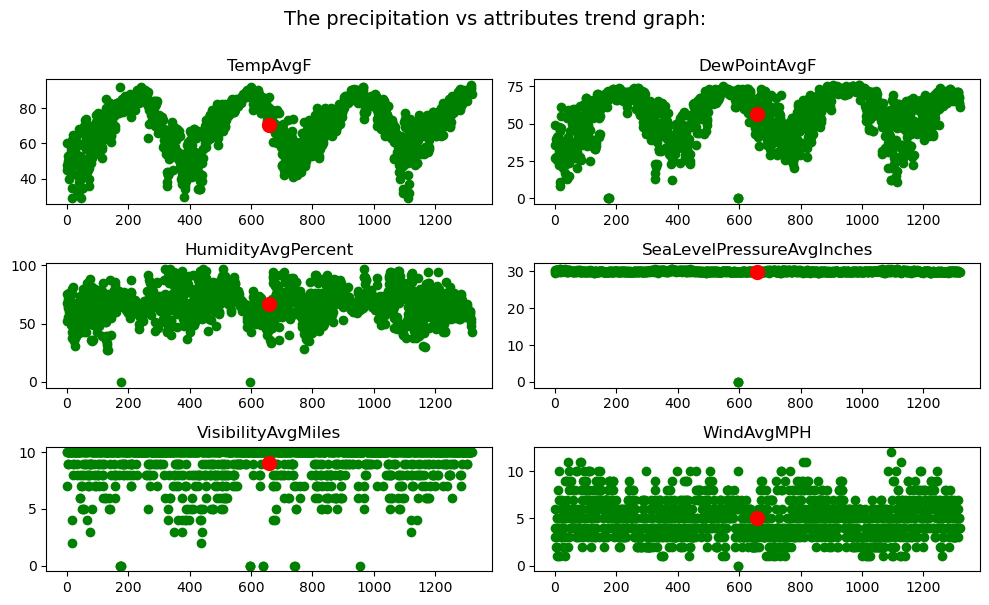

In [41]:
fig, axis = plt.subplots(3, 2, figsize=(10, 6))
fig.suptitle("The precipitation vs attributes trend graph:", fontsize=14, y=1)

# Attribute list and axis setup
attributes = ['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
              'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH']

titles = ['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
          'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH']

axis = axis.flatten()  # Flatten axis for indexing

for i in range(len(attributes)):
    axis[i].scatter(df.index, df[attributes[i]], color='green')  # X-axis is index
    axis[i].scatter(len(df)//2, df[attributes[i]].mean(), color='red', s=100)  # Add red marker for mean value
    axis[i].set_title(titles[i])

plt.tight_layout()
plt.show()